## Découverte de Keras

Keras est une API d'apprentissage en profondeur écrite en Python, s'exécutant sur la plate-forme d'apprentissage automatique TensorFlow . Il a été développé dans le but de permettre une expérimentation rapide.

In [1]:
from pca_img.viz import *
from pca_img.model_dl import *

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [2]:
# renvoie des images d'entraînement et de test avec les étiquettes.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Exploration des dimmensions 

In [3]:
train_test_shape_labels(x_train, x_test, y_train, y_test)

Traning X data shape: (50000, 32, 32, 3)
Testing X data shape: (10000, 32, 32, 3)
****************
Traning y data shape: (50000, 1)
Testing y data shape: (10000, 1)

****************

Total number of outputs : 10
Output classes : [0 1 2 3 4 5 6 7 8 9]


In [4]:
x_train[0].shape
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

## Visualisation des images

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


(None, None)

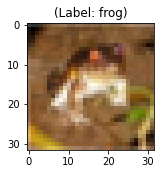

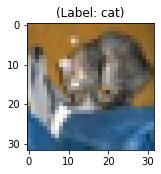

In [5]:
viz_img(x_train, y_train, 0, 0), viz_img(x_test, y_test, 0, 0)

## Vérification des valeurs maximales et minimales des images d'entrainement 

In [6]:
min_max_img(x_train)

Min and max values : (0, 255)
Min and max values must be between 0 and 1 : 0.0, 1.0
(50000, 32, 32, 3)


## Applatissement des images, de quatre à 2 dimmensions

In [7]:
# 3072 correspond au nbr de pixel des images 
x_train_flat = x_train.reshape(-1,3072)
x_train_flat.shape

(50000, 3072)

In [8]:
feat_cols = ['pixel'+ str(i) for i in range(x_train_flat.shape[1])]

## Création d'un DF de 3073 columns, 3072 pixel plus les labels

In [9]:
df_cifar = create_df(x_train, y_train)

Size of the dataframe: (50000, 3073)


In [10]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


# Méthode PCA

## Application de la méthode PCA avec deux composants principaux

In [11]:
principal_cifar_Df = pca_apply(x_train, y_train, 2)

Size of the dataframe: (50000, 3073)
Explained variation per principal component: [0.2907663  0.11253144]


Quantité décente d'informations par les composants principaux 1 et 2, passé de 3072 dimension a 2 composants principaux.
Certain chevauchement de classes sémantiques dans cet ensemble de données, une grenouille peut avoir une forme légèrement similaire à celle d'un chat ou d'un cerf avec un chien ; surtout lorsqu'il est projeté dans un espace à deux dimensions.

In [12]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522103,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

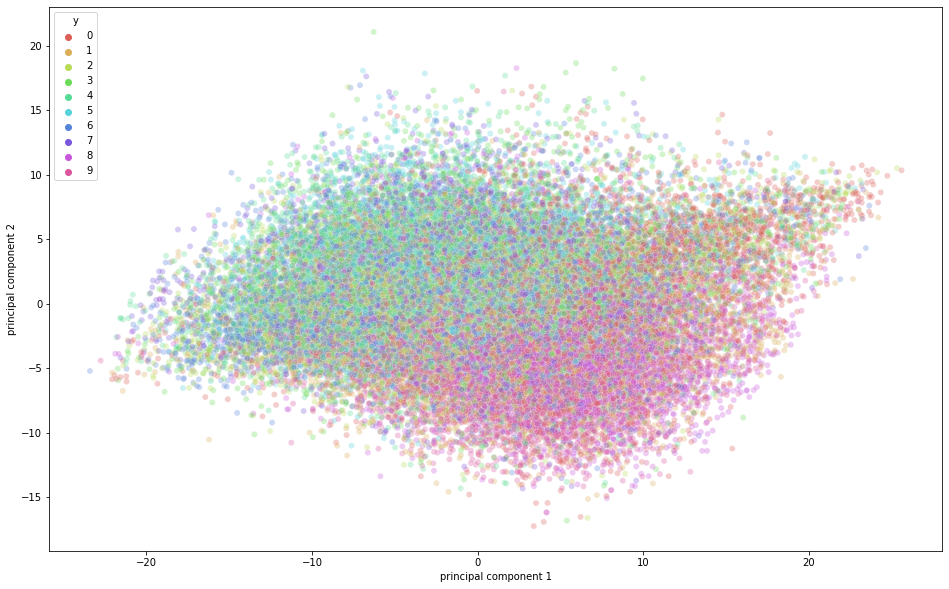

In [13]:
scatter_component(principal_cifar_Df)

Les points appartenant à une même classe sont proches les uns des autres, et les points ou images sémantiquement très différents sont plus éloignés les uns des autres.

## Normalisation des données de test

In [14]:
x_test_flat = normalize_test(x_test)

## Instanciation  du modéle de PCA avec 90 % de la variance

In [15]:
y_train, y_test, train_img_pca, test_img_pca = pca_percentage(x_train_flat, x_test_flat, y_train, y_test, 0.9)

number of components for 90% of the total : 99


In [16]:
print(f'{y_train.shape}\n{y_test.shape}\n{train_img_pca.shape}\n{test_img_pca.shape}')

(50000, 10)
(10000, 10)
(50000, 99)
(10000, 99)


## Compilation et entrainement du modèle

In [17]:
sequential_model_fit(128, 10, 20, 'accuracy', train_img_pca, y_train, test_img_pca, y_test, 99)

Epoch 1/20
391/391 [==============================] - 15s 39ms/step - loss: 9.3226 - accuracy: 0.2631 - val_loss: 2.5896 - val_accuracy: 0.1000
Epoch 2/20
391/391 [==============================] - 15s 39ms/step - loss: 1.6714 - accuracy: 0.4009 - val_loss: 2.3070 - val_accuracy: 0.1000
Epoch 3/20
391/391 [==============================] - 15s 38ms/step - loss: 1.4934 - accuracy: 0.4660 - val_loss: 2.7381 - val_accuracy: 0.1000
Epoch 4/20
391/391 [==============================] - 15s 39ms/step - loss: 1.3952 - accuracy: 0.5023 - val_loss: 5.2465 - val_accuracy: 0.1000
Epoch 5/20
391/391 [==============================] - 15s 38ms/step - loss: 1.3094 - accuracy: 0.5350 - val_loss: 12.5028 - val_accuracy: 0.1000
Epoch 6/20
391/391 [==============================] - 15s 38ms/step - loss: 1.2343 - accuracy: 0.5573 - val_loss: 3.6881 - val_accuracy: 0.1000
Epoch 7/20
391/391 [==============================] - 18s 46ms/step - loss: 1.1834 - accuracy: 0.5777 - val_loss: 4.9578 - val_accuracy

In [18]:
sequential_model_fit(128, 10, 20, 'accuracy', x_train_flat, y_train, x_test_flat, y_test, 3072)

Epoch 1/20
391/391 [==============================] - 44s 112ms/step - loss: 53.5137 - accuracy: 0.1031 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 2/20
391/391 [==============================] - 40s 102ms/step - loss: 2.7427 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
391/391 [==============================] - 53s 135ms/step - loss: 2.4501 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/20
391/391 [==============================] - 53s 136ms/step - loss: 2.3161 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
391/391 [==============================] - 55s 141ms/step - loss: 2.4364 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
391/391 [==============================] - 45s 114ms/step - loss: 2.4298 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
391/391 [==============================] - 45s 116ms/step - loss: 2.3743 - accuracy: 0.0992 - val_loss: 2.3026 - val_a

En comparant le modéle eaffecté par la PCA et celui concernant les donénes brut on observe une plus grande rapidité dans l'apprentissage du modèle avec PCA. On note aussi une meilleur accuracy et donc une plus grande précission du modèle avec PCA. 